In [1]:
import pandas as pd
import numpy as np
import re
import json

from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Making Area Plots of Time-Series Data from Google Books Ngrams and Gale Primary Sources

Time-series data from Google Books Ngrams and Gale Primary Sources can be valuable in examining broad trends in language change. This notebook showcases the process for creating Area Plots of the popularity of words between the years 1700-2000. It required the use of **Pandas** for basic data manipulation, and **plotly** for creating the plots. To export the figures in .pdf format, the **Plotly** extension **Orca** is also required: https://github.com/plotly/orca

The data processing pipeline is as follows:  
1. Read in the raw data
2. Create a dataframe from the data
3. Clean the data
4. Create pivot table of data
5. Create data traces for plotting
6. Plot the data traces

The following function: **make_dataframe_of_totals** will create structured Pandas dataframe from the initial json-files containing the Google Books Ngrams-data. The resulting dataframe will have each word's frequency of use lined up with the timeline of 1700-2001.

In [2]:
def make_dataframe_of_totals(df):
    #Initialize the resulting dataframe:
    df_return = pd.DataFrame(columns=['year', 'ngram', 'popularity'])
    #Filter only the case_insensitive totals to be processed
    totals = df[df['type'] == 'CASE_INSENSITIVE'].reset_index(drop=True)
    #Define the time-span of the data, as the data has no labels for years 
    years = np.arange(1700, 2001)
    #Initialize a list of dictionaries
    dictionary_list = []
    #Loop through each timeseries nested inside a cell of the dataframe.
    #Variable 'series' is a list of the popularities of a word throught the years:
    for idx, series in enumerate(totals['timeseries']):
        #Grab the ngram from the row, capitalize it + 
        #remove the string "(all)" from its end
        ngram_to_update = totals['ngram'][idx].capitalize()
        ngram_to_update = re.sub('\(all\)', '', ngram_to_update)
        #Loop through each datapoint from the timeseries:
        for idx2, num in enumerate(series):
            #initialize dictionary for storing data
            data_dict = {}
            # get the corresponding year from our list of years defined below
            year_to_update = years[idx2]
            #enter the year, word and popularity into our data dictionary
            data_dict.update({'year': year_to_update,
                              'ngram': ngram_to_update,
                              'popularity': num})
            #Add the dictionary to our list of dictionaries
            dictionary_list.append(data_dict)
    #After looping through all entries, turn our list of dictionaries into a dataframe
    df_return = pd.DataFrame(dictionary_list)
    #Print info of the resulting dataframe to the user
    print(f'Dataframe formed with shape: {df_return.shape}')
    return df_return

### Defining the layouts for plotly figures
As the desired figures have to be customizable and identical with each other, it is useful to define a base layout to be used for all of the figures. The Google Ngrams  and Gale Primary Sources need a slightly different layout settings, which is the reason for defining two different layouts below.

In [3]:
layout = {
    "height":800,
    "legend":{
        "bgcolor":"#FFFFFF",
        "font":{
            "family": 'sans serif',
            "color":"rgb(0, 0, 0)",
            "size":16},
        "orientation":"v",
        "x":0.8,
        "y":0.95,
        },
    "paper_bgcolor":"#FFFFFF",
    "plot_bgcolor":"#E5E5E5",
    "title":{
        "font":{
            "family": 'sans serif',
            "color":"rgb(0, 0, 0)",
            "size":32
        },
        "text":""
    },
    "xaxis":{
        "title":{
            "text": "Year",
            "font":{
                "family": 'sans serif',
                "size":20,
                "color": "rgb(0, 0, 0)"
            }
        },
        "tickfont":{
            "family": 'sans serif',
            "size":16,
            "color":"rgb(0, 0, 0)"
        },
        "ticklen": 5,
        "dtick": 25,
    },
    "yaxis":{
        "title":{
            "text": "Cumulative Percentage of All Ngrams",
            "font":{
                "family": 'sans serif',
                "size":20,
                "color": "rgb(0, 0, 0)"
            }
        },
        "tickfont":{
            "family": 'sans serif',
            "size":16,
            "color":"rgb(0, 0, 0)"
        },
        "exponentformat": "none",
        "automargin": True,
        "ticksuffix": "%",
        "ticklen": 5,
    },
    "width": 1100  
}

In [4]:
layout_2 = {
    "height":800,
    "legend":{
        "bgcolor":"#FFFFFF",
        "font":{
            "family": 'sans serif',
            "color":"rgb(0, 0, 0)",
            "size":16},
        "orientation":"v",
        "x":0.87,
        "y":0.95,
        },
    "paper_bgcolor":"#FFFFFF",
    "plot_bgcolor":"#E5E5E5",
    "title":{
        "font":{
            "family": 'sans serif',
            "color":"rgb(0, 0, 0)",
            "size":32
        },
        "text":""
    },
    "xaxis":{
        "title":{
            "text": "Year",
            "font":{
                "family": 'sans serif',
                "size":20,
                "color": "rgb(0, 0, 0)"
            }
        },
        "tickfont":{
            "family": 'sans serif',
            "size":16,
            "color":"rgb(0, 0, 0)"
        },
        "ticklen": 5,
        "dtick": 25,
    },
    "yaxis":{
        "title":{
            "text": "Cumulative Percentage of All Articles",
            "font":{
                "family": 'sans serif',
                "size":20,
                "color": "rgb(0, 0, 0)"
            }
        },
        "tickfont":{
            "family": 'sans serif',
            "size":16,
            "color":"rgb(0, 0, 0)"
        },
        "ticksuffix": "%",
        "ticklen": 5,
    },
    "width": 1100  
}

In [5]:
#Read in first dataset from a .json file:
with open('../data/google_books_ngrams.json', 'r') as f:
    google_books_1 = json.loads(f.read())
#Make it into an initial dataframe
df_tabledata = pd.DataFrame(google_books_1['data'])
#Use our custom function for unnesting the time-series
df = make_dataframe_of_totals(df_tabledata)
#Make pivot table of the time-series
pop_pivot = df.pivot(index='year', columns='ngram', values='popularity')
#Sort the values of the pivot-table by maximum popularity. This is done for readability of figure
pop_pivot = pop_pivot.reindex(pop_pivot.max().sort_values().index, axis=1)

Dataframe formed with shape: (3612, 3)


Plotly figures consist of the **data (traces)** and the **layout (defined above)**.

This following cell initializes a list of traces, loops through the columns of our pivot table,
creates a line-graph of the data, and assigns it to be stacked on top of the other traces.

In [6]:
traces = []
for column in pop_pivot.columns:
    trace = {
        'x': pop_pivot.index,
        'y': pop_pivot[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'width': 1
        }
    }
    traces.append(trace)

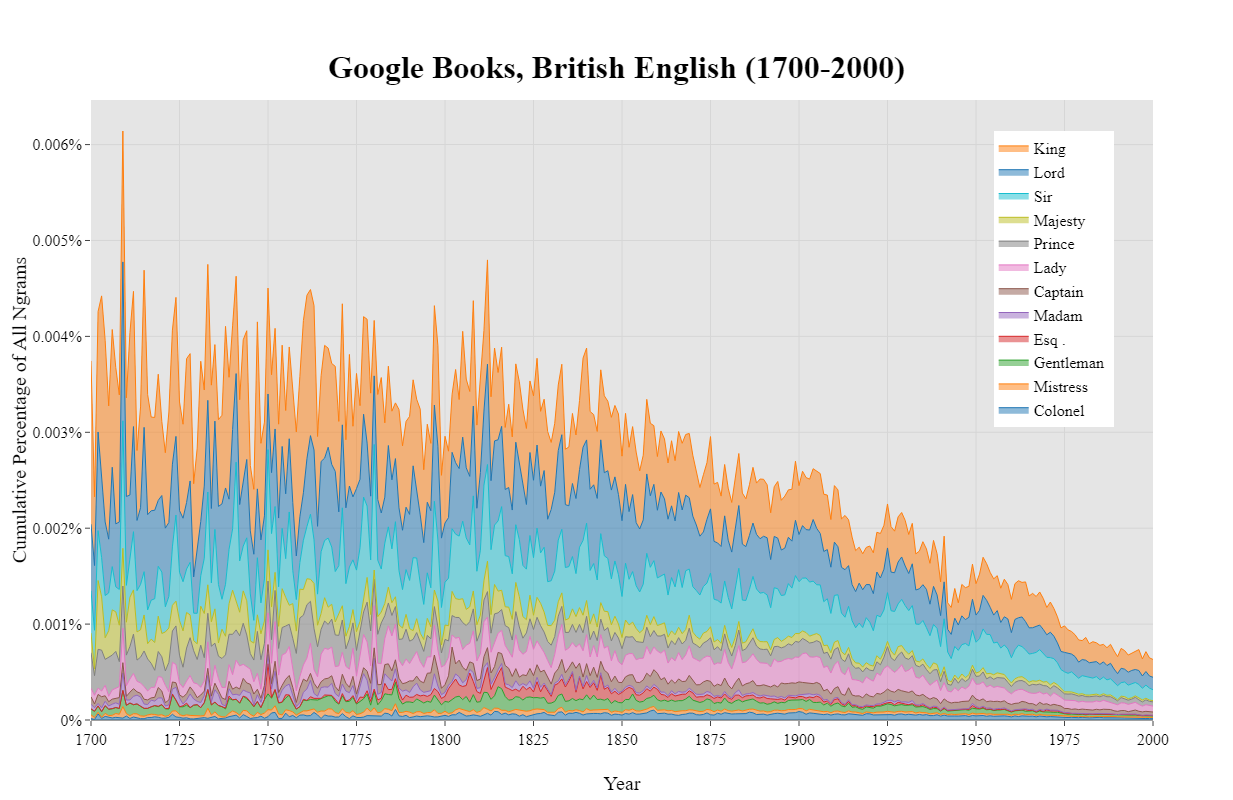

In [7]:
#Define data as traces
data = traces
#Create figure-specific layout specifications
layout_for_fig = layout
#Different figures need different legend placements, titles and x-axis tick intervals for readability
layout_for_fig['legend']['x'] = 0.85
layout_for_fig['title']['y'] = 0.93
layout_for_fig['title']['text'] = '<b>Google Books, British English (1700-2000)'
layout_for_fig['xaxis']['dtick'] = 25
#Define plotly figure object with our data and layout
fig = dict(data=data, layout=layout_for_fig)
#Plot the figure
iplot(fig)

In [8]:
#Write the figure object to a pdf (requires Orca! (https://github.com/plotly/orca))
pio.write_image(fig, '../exported_images/google_books_12Words.pdf', format='pdf')

## The same process from above is repeated with the other Google Books dataset:

In [9]:
with open('../data/google_books_ngrams_2.json', 'r') as f:
    google_books_2 = json.loads(f.read())
    
df_tabledata_2 = pd.DataFrame(google_books_2['data'])
df_2 = make_dataframe_of_totals(df_tabledata_2)
pop_pivot_2 = df_2.pivot(index='year', columns='ngram', values='popularity')

Dataframe formed with shape: (903, 3)


In [10]:
traces = []
for column in pop_pivot_2.columns:
    trace = {
        'x': pop_pivot_2.index,
        'y': pop_pivot_2[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'width': 1
        }
    }
    traces.append(trace)

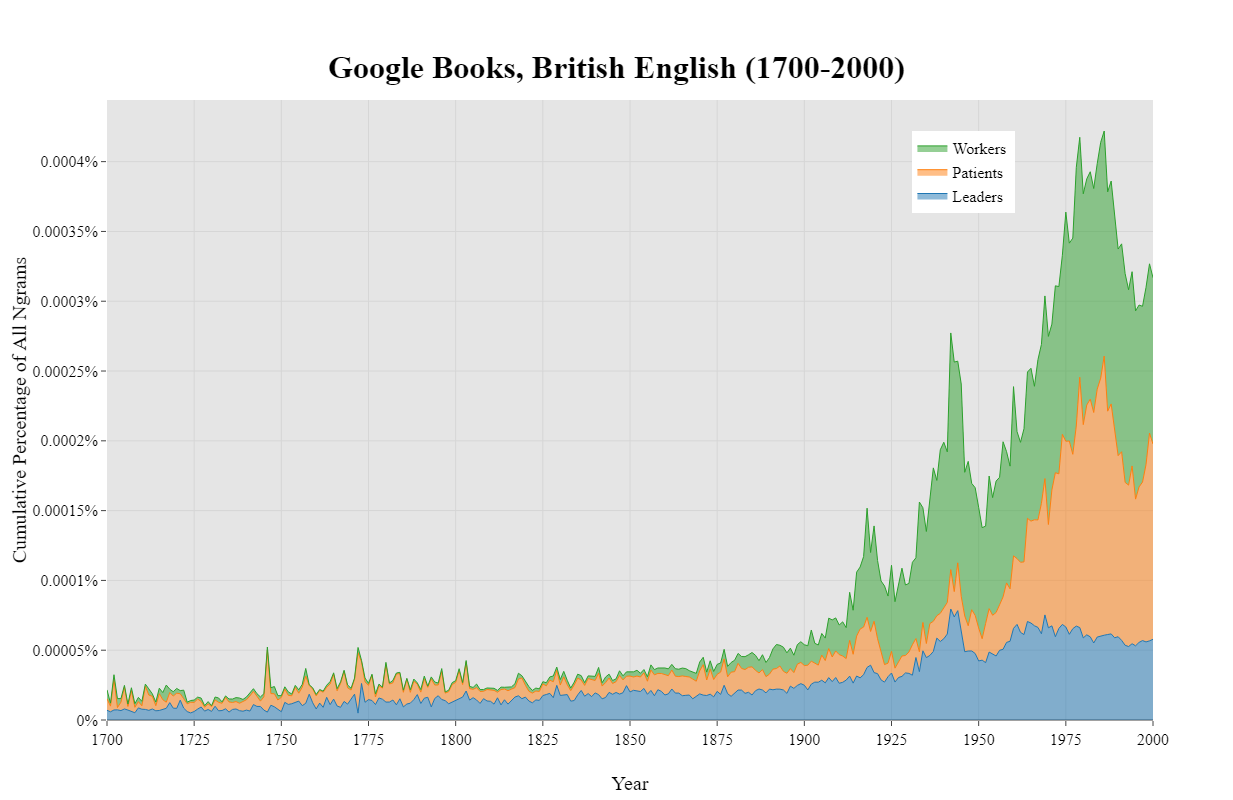

In [11]:
data = traces
layout_for_fig = layout
layout_for_fig['legend']['x'] = 0.77
layout_for_fig['title']['y'] = 0.93
layout_for_fig['title']['text'] = '<b>Google Books, British English (1700-2000)'
layout_for_fig['xaxis']['dtick'] = 25
fig = dict(data=data, layout=layout_for_fig)
iplot(fig)

In [12]:
pio.write_image(fig, '../exported_images/google_books_3Words.pdf', format='pdf')

## Reading and plotting Gale data
The Gale data can be downloaded in a neat .csv file, which makes the initial steps of creating the dataframe easier. The helper function we created for reading the Google Books .json-data is not neede here. After reading in the data and creating the pivot table, the plotting is identical to the Google Books process.

In [13]:
#read in data, replace NaN's with zeroes, and rename the columns
df = pd.read_csv('../data/newspapers_01.csv', header=None)
df = df.fillna(0)
df.columns = ['word', 'year', 'percentage']
#Create pivot table of the data, sort values by maximum popularity
pop_pivot = df.pivot(index='year', columns='word', values='percentage')
pop_pivot = pop_pivot.reindex(pop_pivot.max().sort_values().index, axis=1)
#Capitalize column names
pop_pivot.columns = [str.capitalize(col) for col in pop_pivot.columns]

In [14]:
traces = []
for column in pop_pivot.columns:
    trace = {
        'x': pop_pivot.index,
        'y': pop_pivot[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'shape': 'linear',
            'width': 1
        }
    }
    traces.append(trace)

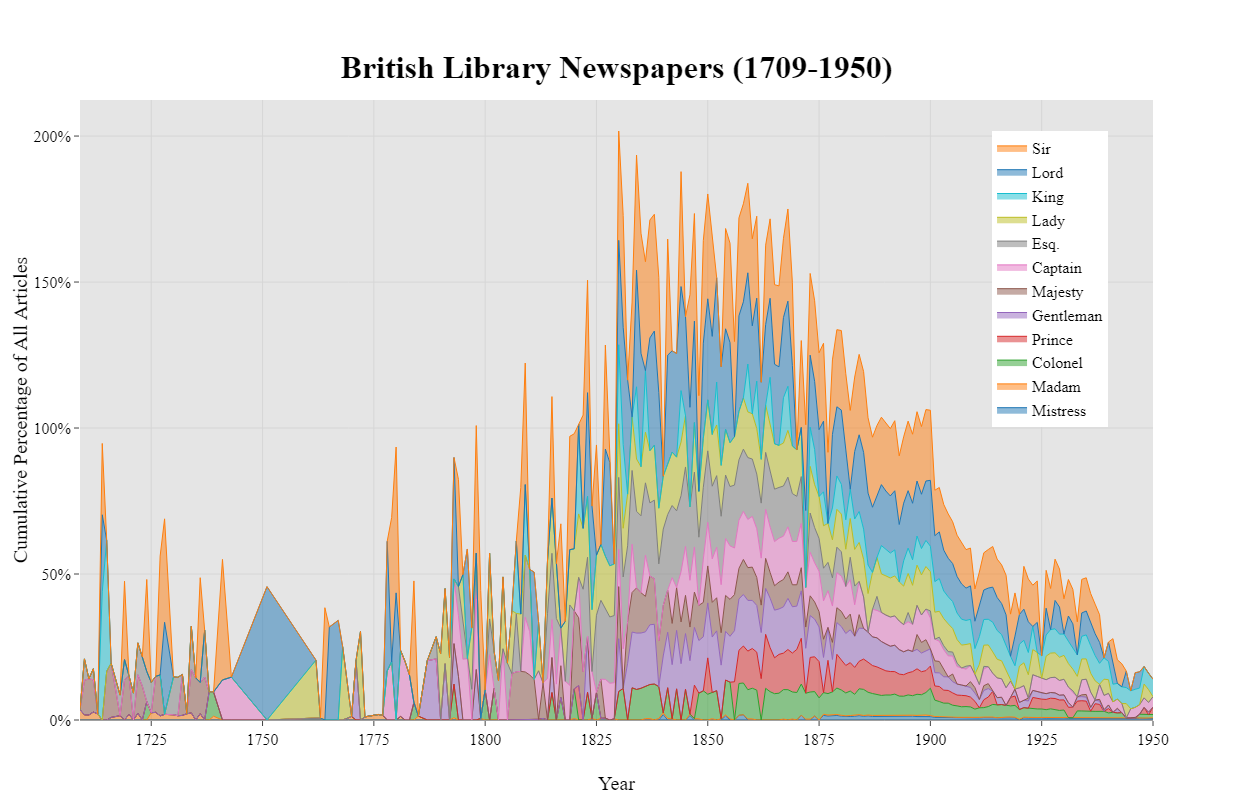

In [15]:
data = traces
layout_for_fig = layout_2
layout_for_fig['legend']['x'] = 0.85
layout_for_fig['title']['y'] = 0.93
layout_for_fig['title']['text'] = '<b>British Library Newspapers (1709-1950)'
layout_for_fig['xaxis']['dtick'] = 25

fig = dict(data=data, layout=layout_for_fig)
iplot(fig)

In [16]:
pio.write_image(fig, '../exported_images/gale_newspapers_12Words.pdf', format='pdf')

The same process applies to all of the Gale data files. Only thing that changes is that the datasets with 3 words are not sorted by maximum popularity to keep the trace colours consistent.

In [17]:
df = pd.read_csv('../data/newspapers_02.csv', header=None)
df = df.fillna(0)
df.columns = ['word', 'year', 'percentage']

pop_pivot = df.pivot(index='year', columns='word', values='percentage')

pop_pivot.columns = [str.capitalize(col) for col in pop_pivot.columns]

In [18]:
traces = []
for column in pop_pivot.columns:
    trace = {
        'x': pop_pivot.index,
        'y': pop_pivot[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'width': 1
        }
    }
    traces.append(trace)

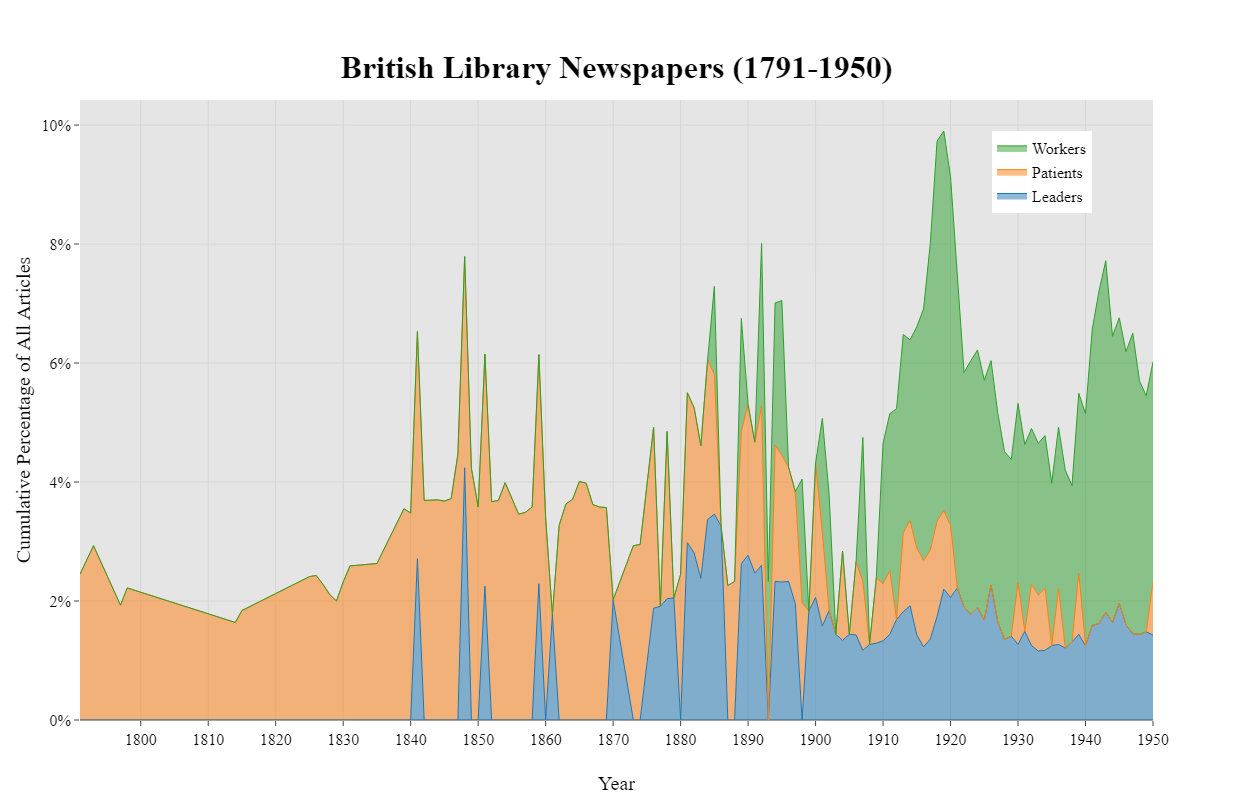

In [19]:
data = traces
layout_for_fig = layout_2
layout_for_fig['legend']['x'] = 0.85
layout_for_fig['title']['y'] = 0.93
layout_for_fig['title']['text'] = '<b>British Library Newspapers (1791-1950)'
layout_for_fig['xaxis']['dtick'] = 10

fig = dict(data=data, layout=layout_for_fig)
iplot(fig)

In [20]:
pio.write_image(fig, '../exported_images/gale_newspapers_3Words.pdf', format='pdf')

In [21]:
df = pd.read_csv('../data/economist_01.csv', header=None)
df = df.fillna(0)
df.columns = ['word', 'year', 'percentage']

pop_pivot = df.pivot(index='year', columns='word', values='percentage')
pop_pivot = pop_pivot.reindex(pop_pivot.max().sort_values().index, axis=1)

pop_pivot.columns = [str.capitalize(col) for col in pop_pivot.columns]

In [22]:
traces = []
for column in pop_pivot.columns:
    trace = {
        'x': pop_pivot.index,
        'y': pop_pivot[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'width': 1
        }
    }
    traces.append(trace)

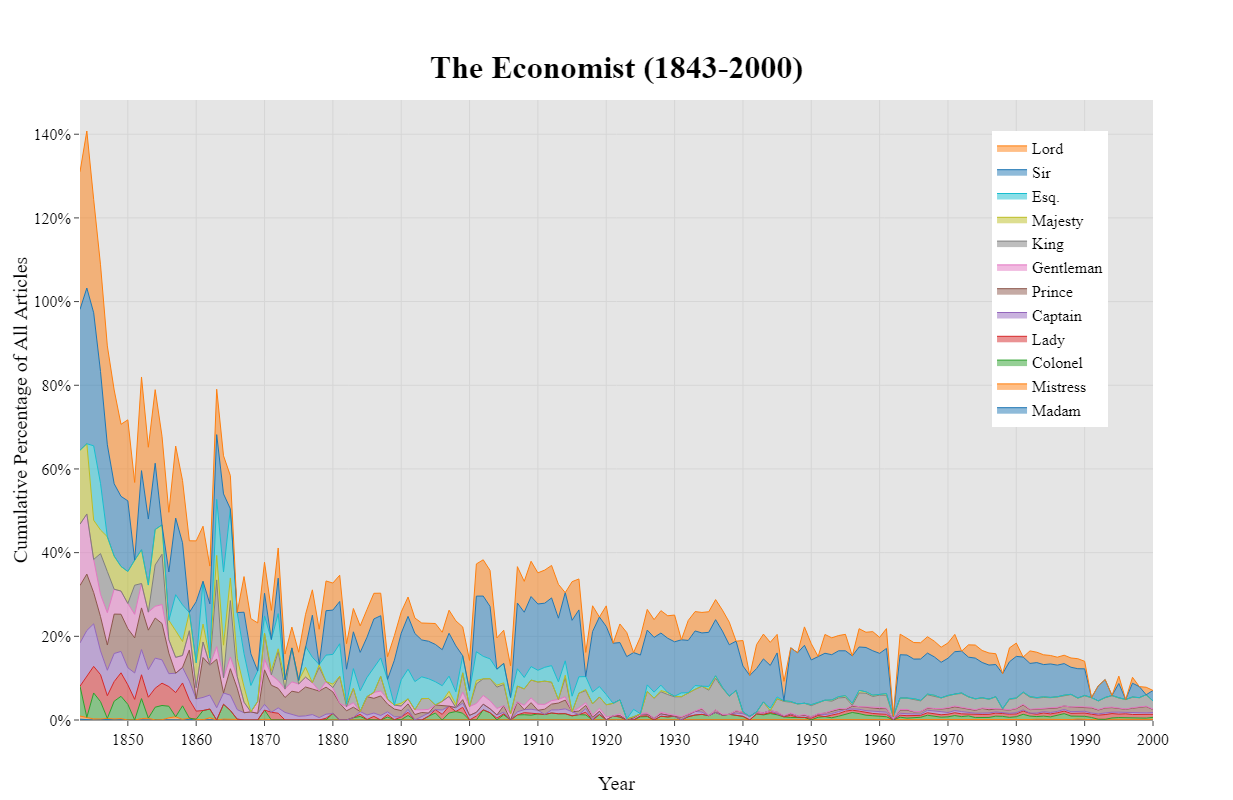

In [23]:
data = traces
layout_for_fig = layout_2
layout_for_fig['legend']['x'] = 0.85
layout_for_fig['title']['text'] = '<b>The Economist (1843-2000)'
layout_for_fig['xaxis']['dtick'] = 10
fig = dict(data=data, layout=layout_for_fig)
iplot(fig, validate=False)

In [24]:
pio.write_image(fig, '../exported_images/economist_12Words.pdf', format='pdf')

In [25]:
df = pd.read_csv('../data/economist_02.csv', header=None)
df = df.fillna(0)
df.columns = ['word', 'year', 'percentage']

pop_pivot = df.pivot(index='year', columns='word', values='percentage')

pop_pivot.columns = [str.capitalize(col) for col in pop_pivot.columns]

In [26]:
traces = []
for column in pop_pivot.columns:
    trace = {
        'x': pop_pivot.index,
        'y': pop_pivot[column],
        'hoverinfo': 'x + y',
        'mode': 'lines',
        'name': column,
        'stackgroup': 'one',
        'line': {
            'width': 1
        }
    }
    traces.append(trace)

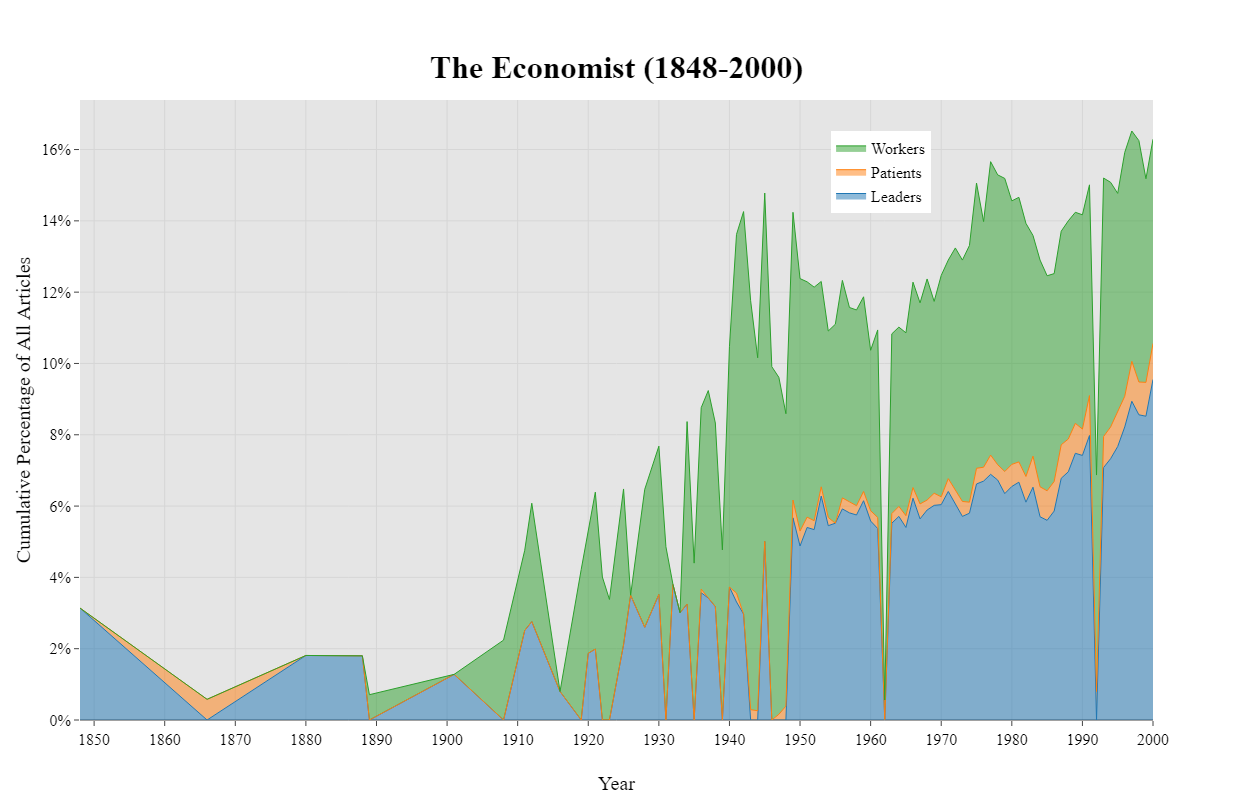

In [27]:
data = traces
layout_for_fig = layout_2
layout_for_fig['legend']['x'] = 0.7
layout_for_fig['title']['text'] = '<b>The Economist (1848-2000)'
layout_for_fig['xaxis']['dtick'] = 10
fig = dict(data=data, layout=layout_for_fig)
iplot(fig, validate=False)

In [28]:
pio.write_image(fig, '../exported_images/economist_3Words.pdf', format='pdf')